## Neural Networks image recognition - MultiLayer Perceptron
Use both MLNN for the following problem.

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data.**
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

# `np.random.normal`

## Parameters

### loc

Mean (“centre”) of the distribution.

### scale

Standard deviation (spread or “width”) of the distribution. Must be non-negative.

### size

Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.

# Neural Networks - Image Recognition 

In [41]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
%matplotlib inline

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [32]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255 # normalize
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


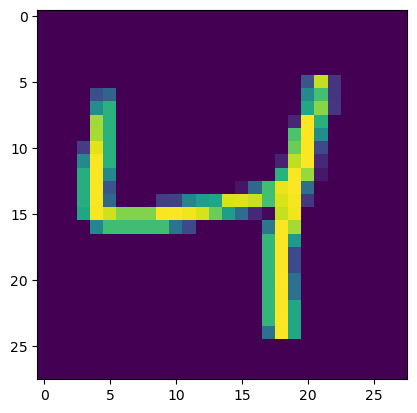

In [9]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[2])

# Question 1: 
1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data.**

# Solution to Question 1

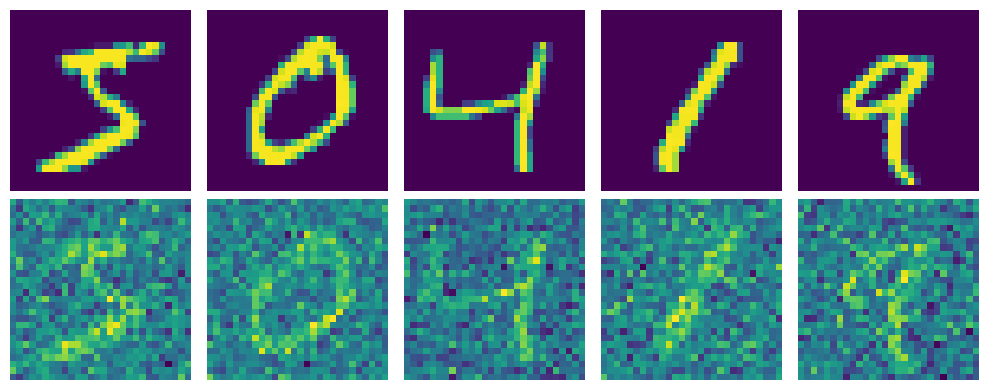

In [25]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# reshape datasets
x_train_flat = x_train.reshape(60000, 784)
x_test_flat = x_test.reshape(10000, 784)


# scale of the noise
noise_scale = 0.5

# Add noise to the training data
noise = noise_scale * np.random.normal(loc=0.0, scale=1.0, size=x_train_flat.shape)
noisy_x_train_flat = x_train_flat + noise

# setup images by 2x5
fig, axes = plt.subplots(2, 5, figsize=(10, 4))  

# Loop: see 1st 5 images without noise
for i in range(5):
    axes[0, i].imshow(x_train[i])
    axes[0, i].axis('off')  # Turn off the axis labels

# Loop: see 1st 5 images WITH noise
for i in range(5):
    axes[1, i].imshow(noisy_x_train_flat[i].reshape(28, 28))
    axes[1, i].axis('off')  # Turn off the axis labels

# show images
plt.tight_layout()
plt.show()


# Question 2: 
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 

# Solution to Question 2
Model w/Noise: Loss = 52% and Accuracy = 92% 

Model w/o Noise: Loss = 8% and Accurancy = 98%

### Noise Added

In [35]:
# Noise is added here
# The max value of the noise should not grossly surpass 1.0

# create function to loop thru for Question 3

# scale of the noise
noise_scale = 0.5

# add_noise function
def add_noise(data, noise_scale=noise_scale):
    noisy_images = data + noise_scale * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    return noisy_images

noisy_x_train = add_noise(x_train, noise_scale=noise_scale)
noisy_x_test = add_noise(x_test, noise_scale=noise_scale)


## Model w/Noise

In [34]:
batch_size = 128
num_classes = 10
epochs = 20

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# reshape datasets
x_train_flat = x_train.reshape(60000, 784)
x_test_flat = x_test.reshape(10000, 784)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(noisy_x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(noisy_x_test, y_test))
score = model.evaluate(noisy_x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7344 - loss: 0.8093 - val_accuracy: 0.8993 - val_loss: 0.3150
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9230 - loss: 0.2437 - val_accuracy: 0.9138 - val_loss: 0.2686
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9607 - loss: 0.1228 - val_accuracy: 0.9182 - val_loss: 0.2720
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9773 - loss: 0.0701 - val_accuracy: 0.9184 - val_loss: 0.3046
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9828 - loss: 0.0509 - val_accuracy: 0.9186 - val_loss: 0.3208
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9876 - loss: 0.0375 - val_accuracy: 0.9151 - val_loss: 0.3630
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9876 - loss: 0.0378 - val_accuracy: 0.9210 - val_loss: 0.3747
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9886 - loss: 0.0335 - val_ac

## Model w/o Noise

In [4]:
batch_size = 128
num_classes = 10
epochs = 20


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8637 - loss: 0.4477 - val_accuracy: 0.9653 - val_loss: 0.1053
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9671 - loss: 0.1052 - val_accuracy: 0.9749 - val_loss: 0.0828
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9776 - loss: 0.0721 - val_accuracy: 0.9775 - val_loss: 0.0716
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9822 - loss: 0.0553 - val_accuracy: 0.9781 - val_loss: 0.0716
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9845 - loss: 0.0462 - val_accuracy: 0.9796 - val_loss: 0.0656
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9891 - loss: 0.0341 - val_accuracy: 0.9801 - val_loss: 0.0645
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9900 - loss: 0.0307 - val_accuracy: 0.9810 - val_loss: 0.0702
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9904 - loss: 0.0290 - val_accuracy

# Question 3:
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

# Solution to Question 3

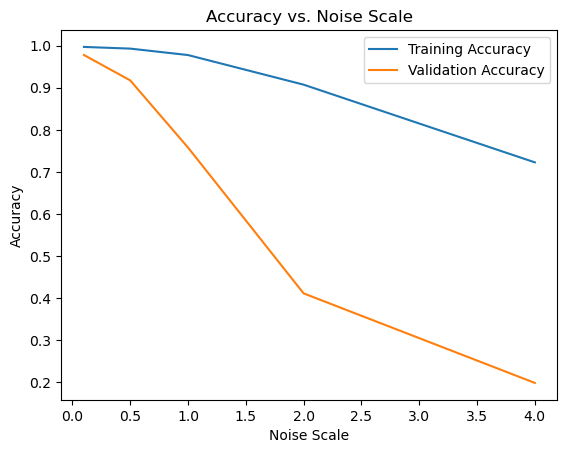

In [40]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Define the noise scales to use
noise_scales = [0.1, 0.5, 1.0, 2.0, 4.0]

# Prepare to collect accuracy data
train_accuracies = []
val_accuracies = []

# Loop over the noise scales and train and evaluate the model for each
for scale in noise_scales:
    # Create a new model for each noise level
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    # Add noise to the training and testing data
    noisy_x_train = add_noise(x_train, noise_scale=scale)
    noisy_x_test = add_noise(x_test, noise_scale=scale)
    
    # Train the model
    history = model.fit(noisy_x_train, y_train,
                        batch_size=128,
                        epochs=20,
                        verbose=0,
                        validation_data=(noisy_x_test, y_test))
    
    # Store the accuracies
    train_accuracies.append(history.history['accuracy'][-1])
    val_accuracies.append(history.history['val_accuracy'][-1])

# Plot the accuracies
plt.plot(noise_scales, train_accuracies, label='Training Accuracy')
plt.plot(noise_scales, val_accuracies, label='Validation Accuracy')
plt.title('Accuracy vs. Noise Scale')
plt.xlabel('Noise Scale')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Below was not required for the HW but I was curious to explore other model combinations

### Result: All other combination were substantially worse than the original model used in Question 3.

## Loop thru 45 combinations of models: changing optimizer, activiation, noise scale
#### IGNORE PLOTS (re-plotted further below, parsing out models)

Iteration 1 of 45 completed.
Iteration 2 of 45 completed.
Iteration 3 of 45 completed.
Iteration 4 of 45 completed.
Iteration 5 of 45 completed.
Iteration 6 of 45 completed.
Iteration 7 of 45 completed.
Iteration 8 of 45 completed.
Iteration 9 of 45 completed.
Iteration 10 of 45 completed.
Iteration 11 of 45 completed.
Iteration 12 of 45 completed.
Iteration 13 of 45 completed.
Iteration 14 of 45 completed.
Iteration 15 of 45 completed.
Iteration 16 of 45 completed.
Iteration 17 of 45 completed.
Iteration 18 of 45 completed.
Iteration 19 of 45 completed.
Iteration 20 of 45 completed.
Iteration 21 of 45 completed.
Iteration 22 of 45 completed.
Iteration 23 of 45 completed.
Iteration 24 of 45 completed.
Iteration 25 of 45 completed.
Iteration 26 of 45 completed.
Iteration 27 of 45 completed.
Iteration 28 of 45 completed.
Iteration 29 of 45 completed.
Iteration 30 of 45 completed.
Iteration 31 of 45 completed.
Iteration 32 of 45 completed.
Iteration 33 of 45 completed.
Iteration 34 of 45 

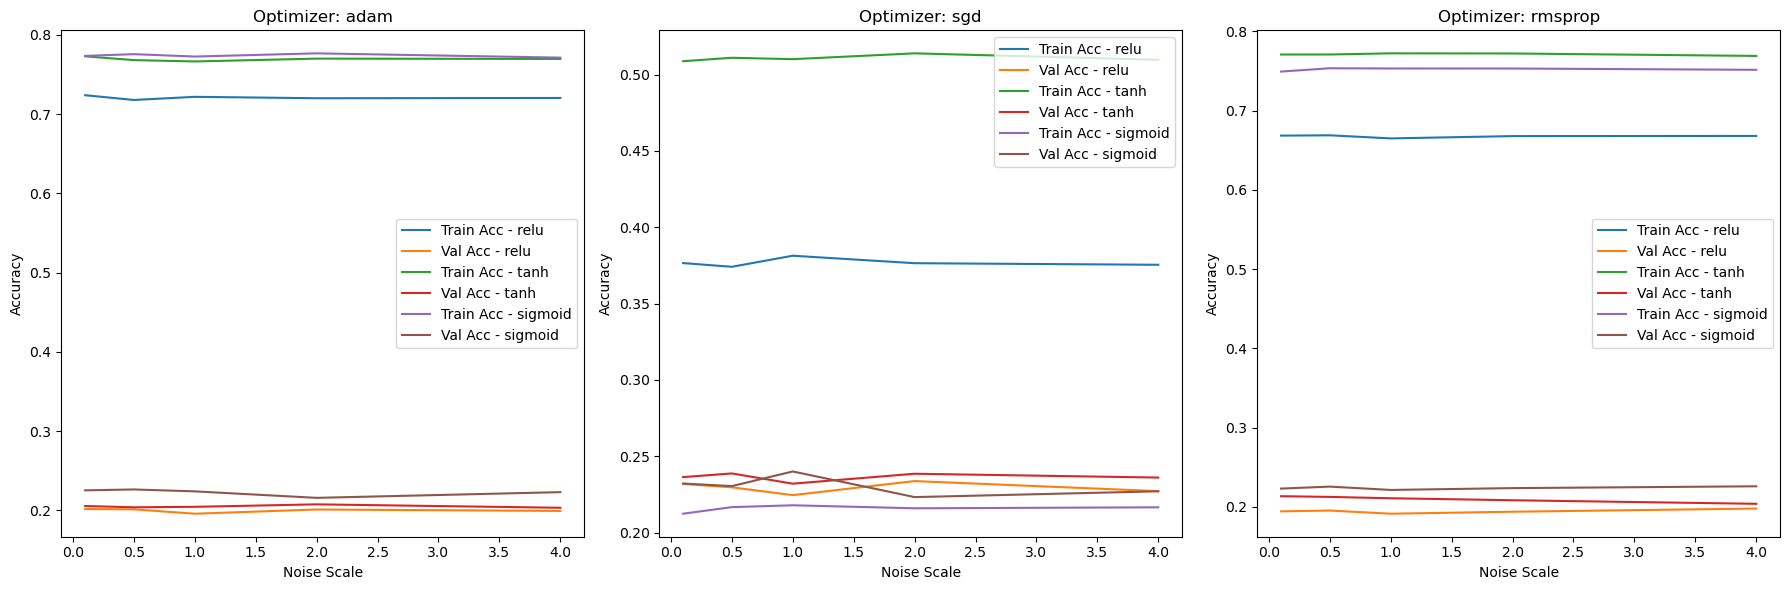

   Optimizer Activation  Noise Scale  Train Accuracy  Validation Accuracy
0       adam       relu          0.1        0.723967               0.2018
1       adam       relu          0.5        0.717967               0.2014
2       adam       relu          1.0        0.721933               0.1959
3       adam       relu          2.0        0.720167               0.2012
4       adam       relu          4.0        0.720483               0.1994
5       adam       tanh          0.1        0.773017               0.2056
6       adam       tanh          0.5        0.768283               0.2040
7       adam       tanh          1.0        0.766567               0.2046
8       adam       tanh          2.0        0.770150               0.2077
9       adam       tanh          4.0        0.769750               0.2034
10      adam    sigmoid          0.1        0.773617               0.2254
11      adam    sigmoid          0.5        0.775783               0.2265
12      adam    sigmoid          1.0  

In [43]:
def create_model(optimizer, activation):
    model = Sequential([
        Dense(512, activation=activation, input_shape=(784,)),
        Dropout(0.2),
        Dense(512, activation=activation),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

noise_scales = [0.1, 0.5, 1.0, 2.0, 4.0]
optimizers = ['adam', 'sgd', 'rmsprop']
activations = ['relu', 'tanh', 'sigmoid']

fig, axes = plt.subplots(1, len(optimizers), figsize=(18, 6))
model_scores = []

iteration_counter = 0

for optimizer_index, optimizer in enumerate(optimizers):
    for activation in activations:
        train_accuracies = []
        val_accuracies = []
        for scale in noise_scales:
            model = create_model(optimizer=optimizer, activation=activation)
            history = model.fit(noisy_x_train, y_train, batch_size=128, epochs=20, verbose=0, validation_data=(noisy_x_test, y_test))
            
            train_acc = history.history['accuracy'][-1]
            val_acc = history.history['val_accuracy'][-1]
            train_accuracies.append(train_acc)
            val_accuracies.append(val_acc)

            iteration_counter += 1
            print(f'Iteration {iteration_counter} of 45 completed.')

            model_scores.append({
                'Optimizer': optimizer,
                'Activation': activation,
                'Noise Scale': scale,
                'Train Accuracy': train_acc,
                'Validation Accuracy': val_acc
            })

        # Plot accuracies for the current optimizer and activation function combination
        axes[optimizer_index].plot(noise_scales, train_accuracies, label=f'Train Acc - {activation}')
        axes[optimizer_index].plot(noise_scales, val_accuracies, label=f'Val Acc - {activation}')
        axes[optimizer_index].set_title(f'Optimizer: {optimizer}')
        axes[optimizer_index].set_xlabel('Noise Scale')
        axes[optimizer_index].set_ylabel('Accuracy')
        axes[optimizer_index].legend()

plt.tight_layout()
plt.show()

# Create and display the DataFrame
df = pd.DataFrame(model_scores)
print(df)


#### Print out of saved Scores

In [53]:
print(df)

   Optimizer Activation  Noise Scale  Train Accuracy  Validation Accuracy
0       adam       relu          0.1        0.723967               0.2018
1       adam       relu          0.5        0.717967               0.2014
2       adam       relu          1.0        0.721933               0.1959
3       adam       relu          2.0        0.720167               0.2012
4       adam       relu          4.0        0.720483               0.1994
5       adam       tanh          0.1        0.773017               0.2056
6       adam       tanh          0.5        0.768283               0.2040
7       adam       tanh          1.0        0.766567               0.2046
8       adam       tanh          2.0        0.770150               0.2077
9       adam       tanh          4.0        0.769750               0.2034
10      adam    sigmoid          0.1        0.773617               0.2254
11      adam    sigmoid          0.5        0.775783               0.2265
12      adam    sigmoid          1.0  

## Re-plot Scores

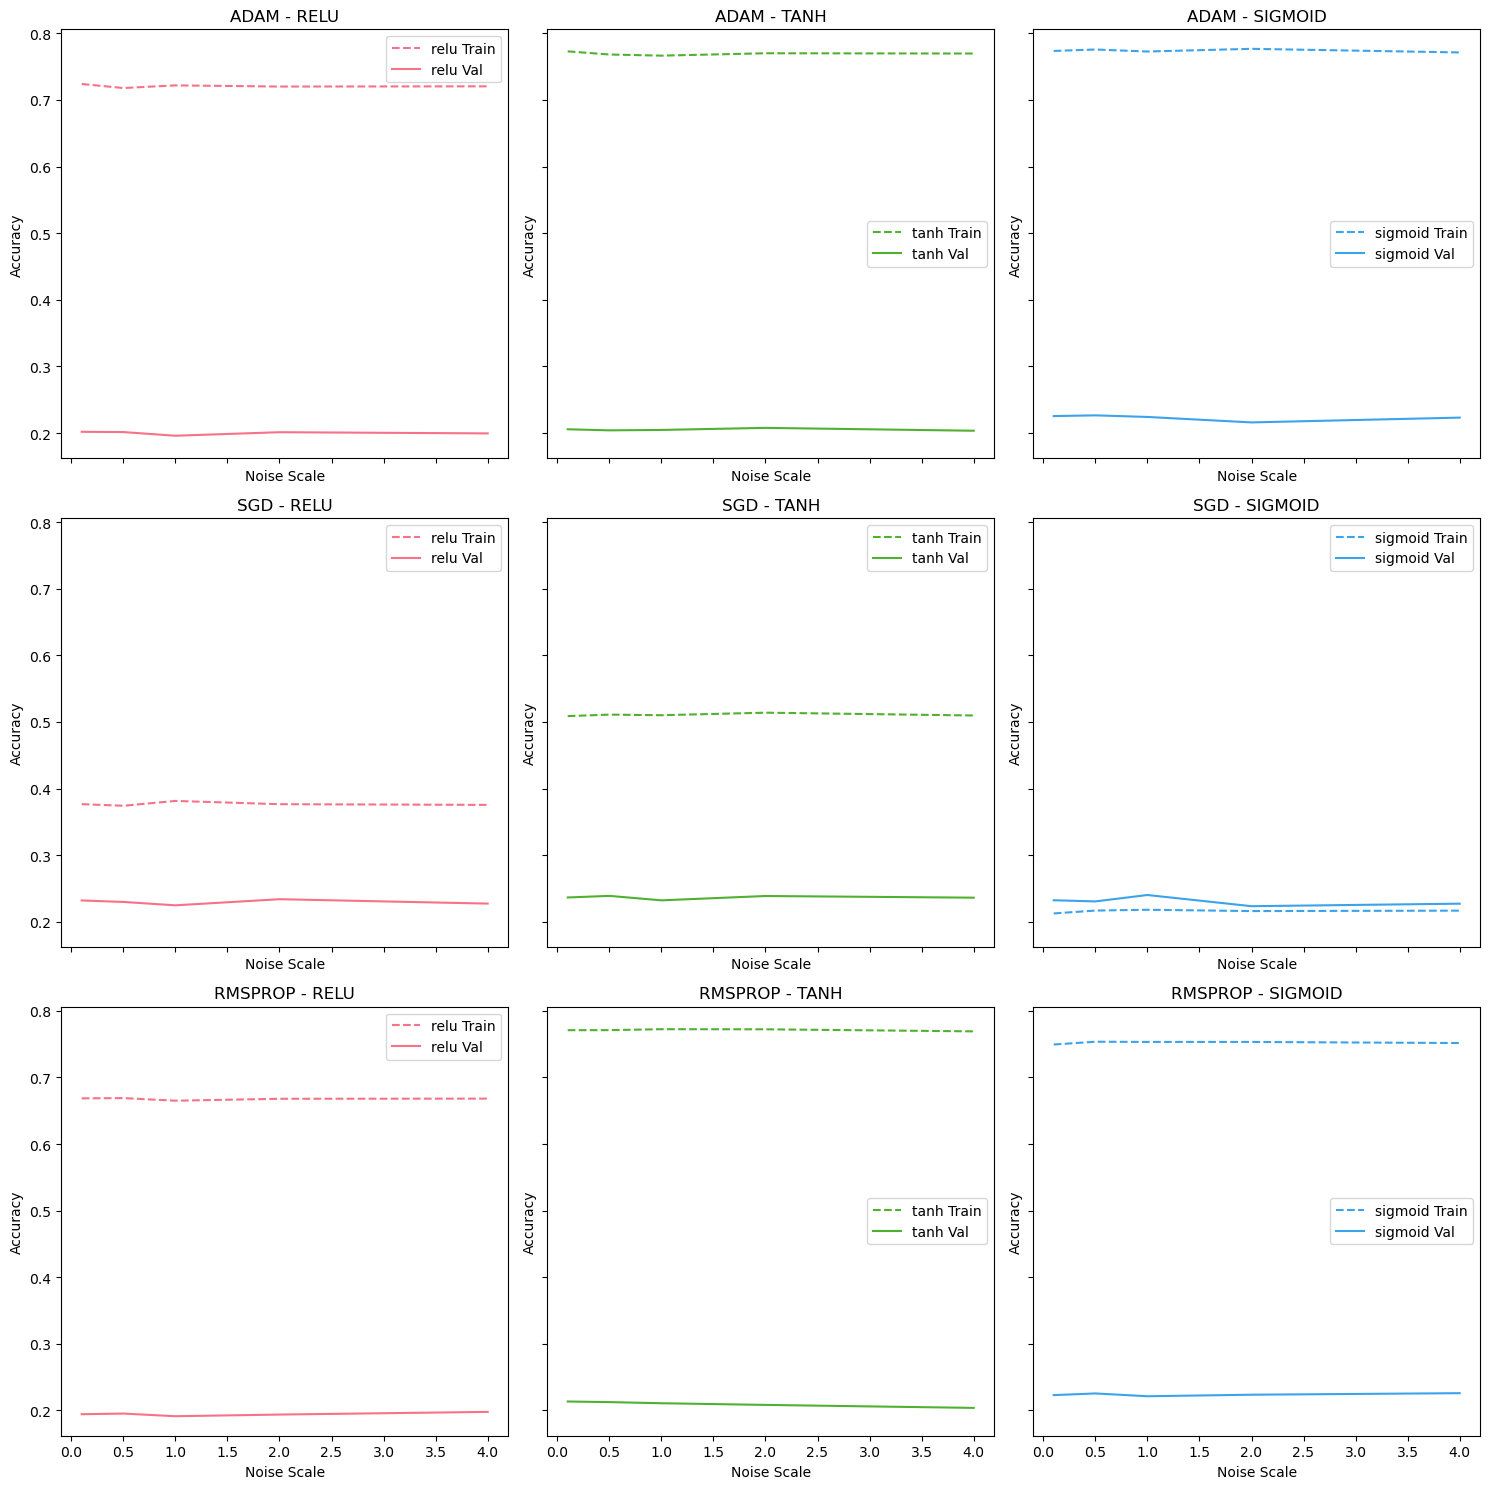

In [63]:

import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

df_scores = df

# Assuming 'df_scores' is your DataFrame
optimizers = df_scores['Optimizer'].unique()
activations = df_scores['Activation'].unique()

# Setting up the color palette
palette = sns.color_palette("husl", len(activations))
activation_colors = {activation: palette[i] for i, activation in enumerate(activations)}

# Creating 3x3 subplot structure
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=True, sharey=True)
axes = axes.flatten()

# Plotting
for i, optimizer in enumerate(optimizers):
    for j, activation in enumerate(activations):
        ax = axes[i * len(optimizers) + j]
        
        # Filter the data for each optimizer and activation function
        subset = df_scores[(df_scores['Optimizer'] == optimizer) & (df_scores['Activation'] == activation)]
        
        # Plot Training Accuracy as dashed lines
        ax.plot('Noise Scale', 'Train Accuracy', data=subset, color=activation_colors[activation], 
                linestyle='--', label=f"{activation} Train")
        
        # Plot Validation Accuracy as solid lines
        ax.plot('Noise Scale', 'Validation Accuracy', data=subset, color=activation_colors[activation], 
                linestyle='-', label=f"{activation} Val")

        ax.set_title(f"{optimizer.upper()} - {activation.upper()}")
        ax.set_xlabel("Noise Scale")
        ax.set_ylabel("Accuracy")
        ax.legend()

plt.tight_layout()
plt.show()
